In [5]:
#Mount your google drive to fetch the stored data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Import all necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble

In [67]:
%%time
train = pd.read_csv('/content/drive/My Drive/BigMart/train_v9.csv')
test = pd.read_csv('/content/drive/My Drive/BigMart/test_v9.csv')
print(train.shape, test.shape)

(8523, 12) (5681, 11)
CPU times: user 27.6 ms, sys: 7.93 ms, total: 35.5 ms
Wall time: 37.9 ms


In [68]:
# combining the train and test dataset
data = pd.concat([train, test])
print(data.shape)

(14204, 12)


In [69]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [70]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [72]:
len(train.columns)

12

In [73]:
len(test.columns)

11

In [74]:
for i in ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  print("Count Info for {} is {}".format(i, train[i].value_counts()))
  print("Count Info for {} is {}".format(i, train[i].nunique()))

Count Info for Item_Fat_Content is Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Count Info for Item_Fat_Content is 5
Count Info for Item_Type is Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Count Info for Item_Type is 16
Count Info for Outlet_Size is Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Count Info for Outlet_Size is 3
Count Info for Outlet_Location_Type is Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Locati

In [75]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
pd.set_option('max_rows', 200)
pd.set_option('max_colwidth', 200)

In [77]:
train['Item_Identifier'].value_counts(ascending=False)[0:20]

FDG33    10
FDW13    10
NCJ30     9
FDD38     9
FDX31     9
DRN47     9
NCL31     9
FDF56     9
FDV38     9
FDV60     9
NCY18     9
NCB18     9
FDX04     9
FDQ40     9
FDT07     9
DRE49     9
FDP25     9
NCQ06     9
FDU12     9
NCF42     9
Name: Item_Identifier, dtype: int64

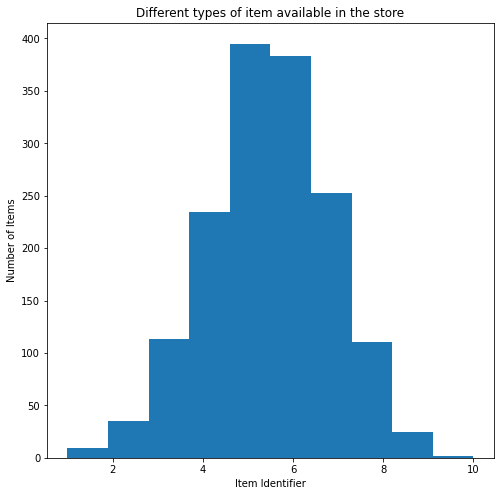

In [78]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist(figsize=(8,8))
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.show()

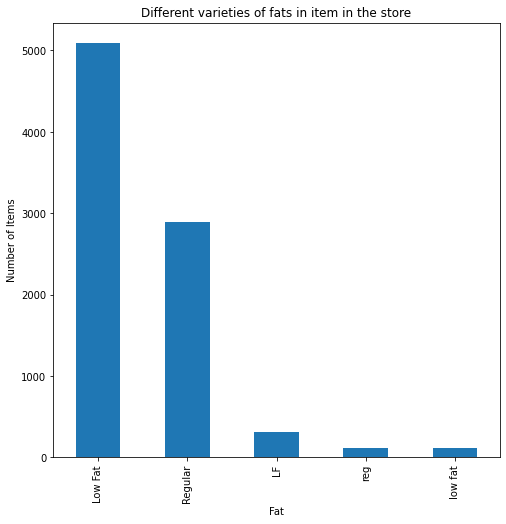

In [79]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar(figsize=(8,8))
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

#Feature Engineering

In [80]:
data['Item_Weight']= data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [81]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [82]:
pd.crosstab(data['Outlet_Size'], data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [83]:
pd.crosstab(data['Outlet_Size'], data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [84]:
d={'Grocery Store':'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}
s=data['Outlet_Type'].map(d)
data['Outlet_Size']= data['Outlet_Size'].combine_first(s)

In [85]:
d={'Tier 2':'Small'}
s=data['Outlet_Location_Type'].map(d)
data['Outlet_Size']= data['Outlet_Size'].combine_first(s)

In [86]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [87]:
len(data['Item_Visibility'][data['Item_Visibility']==0])

879

In [88]:
'''From above observations their are many zeros for item_Visiblity which not possible so 
fill by corresponding means of Item_Identifiers'''
data['Item_Visibility']= data['Item_Visibility'].replace(0.00000,np.nan) #First fill by nan for simplicity
data['Item_Visibility']= data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [89]:
# No of years outlet is working conditon 
data['Outlet_Establishment_Year']= data['Outlet_Establishment_Year'].astype(int)
data['Outlet_Period']= 2020- data['Outlet_Establishment_Year']
data.drop(columns=['Outlet_Establishment_Year'], inplace=True)

In [90]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [91]:
# Now replace LF by Low Fat, low fat by Low Fat, reg by Regular
data['Item_Fat_Content']= data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [92]:
# Getting the first two characters of ID to separate them into different categories
Col_Item_Identifier= data['Item_Identifier'].copy()
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [93]:
# Removing unnecessary columns from the dataset
Col_Outlet_Identifier= data['Outlet_Identifier'].copy()
data= data.drop('Outlet_Identifier', axis = 1)

## Converting Categorical to Numerical

In [94]:
for i in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  data[i]= LabelEncoder().fit_transform(data[i])
data= pd.get_dummies(data, columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [95]:
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Period,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,249.8092,3735.1380,21,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,21,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.022930,182.0950,732.3800,22,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,8.93,0.014670,53.8614,994.7052,33,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,NaN,23,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
5677,7.60,0.142991,169.1448,NaN,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
5678,10.00,0.073529,118.7440,NaN,18,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
5679,15.30,0.098200,214.6218,NaN,13,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [96]:
train_cp= data.iloc[:8523, :]

In [97]:
train_cp.isnull().sum()

Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Item_Outlet_Sales         0
Outlet_Period             0
Item_Identifier_0         0
Item_Identifier_1         0
Item_Identifier_2         0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Type_0               0
Item_Type_1               0
Item_Type_2               0
Item_Type_3               0
Item_Type_4               0
Item_Type_5               0
Item_Type_6               0
Item_Type_7               0
Item_Type_8               0
Item_Type_9               0
Item_Type_10              0
Item_Type_11              0
Item_Type_12              0
Item_Type_13              0
Item_Type_14              0
Item_Type_15              0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3       

In [98]:
train_cp.drop(columns=['Item_Outlet_Sales'], inplace=True)

In [99]:
train_cp.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Period',
       'Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [100]:
# calculating VIF for each feature 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(train_cp.values, i) for i in range(len(train_cp.columns))] 
vif_df= pd.DataFrame({'Features': train_cp.columns, 'VIF_value': vif})
vif_df

,Features,VIF_value
0,Item_Weight,1.018330
1,Item_Visibility,1.104231
2,Item_MRP,1.017768
3,Outlet_Period,50.920979
4,Item_Identifier_0,inf
5,Item_Identifier_1,inf
6,Item_Identifier_2,inf
7,Item_Fat_Content_0,inf
8,Item_Fat_Content_1,inf
9,Item_Type_0,inf


In [101]:
"Heatmap not suggested"
'''corr = train_cp.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_cp.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()'''

'corr = train_cp.corr()\nf,ax = plt.subplots(figsize=(20, 20))\nsns.heatmap(train_cp.corr(), annot=True, fmt= \'.1f\',ax=ax, cmap="BrBG")\nsns.set(font_scale=1.25)\nplt.show()'

In [102]:
train_cp.drop(columns=['Outlet_Period', 'Item_Identifier_0', 'Item_Fat_Content_0', 'Item_Type_15', 'Outlet_Location_Type_1', 'Outlet_Type_2'], inplace=True)

In [103]:
# calculating VIF for each feature 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(train_cp.values, i) for i in range(len(train_cp.columns))] 
vif_df= pd.DataFrame({'Features': train_cp.columns, 'VIF_value': vif})
vif_df

,Features,VIF_value
0,Item_Weight,1.018266
1,Item_Visibility,1.104218
2,Item_MRP,1.017723
3,Item_Identifier_1,15.846177
4,Item_Identifier_2,inf
5,Item_Fat_Content_1,1.236781
6,Item_Type_0,4.989128
7,Item_Type_1,2.627117
8,Item_Type_2,1.725338
9,Item_Type_3,4.985856


In [104]:
data.drop(columns=['Outlet_Period', 'Item_Identifier_0', 'Item_Fat_Content_0', 'Item_Type_15', 'Outlet_Location_Type_1', 'Outlet_Type_2'], inplace=True)

In [105]:
# Importing data DF to My drive
#data.to_csv('/content/drive/My Drive/BigMart/BigMart.csv', index=False)

# Begin with ML Training

In [106]:
'''# Mount your google drive to fetch the stored data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)'''

"# Mount your google drive to fetch the stored data\nfrom google.colab import drive\ndrive.mount('/content/drive', force_remount=True)"

In [107]:
#data = pd.read_csv('/content/drive/My Drive/BigMart/BigMart.csv')
#print(data.shape)

In [108]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]
print(train.shape, test.shape)

(8523, 30) (5681, 30)


In [109]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,19.20,0.022930,182.0950,732.3800,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,8.93,0.014670,53.8614,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


In [110]:
# Importing data DF to My drive
train.to_csv('/content/drive/My Drive/BigMart/train_xb.csv', index=False)

# Begin Test

In [180]:
train= pd.read_csv('/content/drive/My Drive/BigMart/train_xb.csv')
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,19.20,0.022930,182.0950,732.3800,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,8.93,0.014670,53.8614,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


# Feature Scaling

In [181]:
from sklearn import preprocessing
scaler3 = preprocessing.StandardScaler()
scaler2 = preprocessing.RobustScaler()
scaler1 = preprocessing.MinMaxScaler()
columns= [i for i in train.columns]
scaled_df = scaler3.fit_transform(train)
scaled_df

array([[-0.76924555, -1.08810123,  1.74745381, ..., -0.38152918,
         0.72680189, -0.35102831],
       [-1.49681258, -1.02378856, -1.48902325, ..., -0.38152918,
        -1.37589075, -0.35102831],
       [ 0.9958579 , -1.07391317,  0.01004021, ..., -0.38152918,
         0.72680189, -0.35102831],
       ...,
       [-0.48941207, -0.7071323 , -0.89720755, ..., -0.38152918,
         0.72680189, -0.35102831],
       [-1.21913167,  1.48314638, -0.60797692, ..., -0.38152918,
        -1.37589075, -0.35102831],
       [ 0.4146653 , -0.51420894, -1.05226104, ..., -0.38152918,
         0.72680189, -0.35102831]])

In [182]:

# preparee a df from n-D array
train = pd.DataFrame(scaled_df, columns= columns)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
0,-0.769246,-1.088101,1.747454,0.910601,0.625708,-0.480558,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.350395,1.432326,-1.134925,1.602840,-0.804732,-0.381529,0.726802,-0.351028
1,-1.496813,-1.023789,-1.489023,-1.018440,-1.598190,-0.480558,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.350395,1.432326,-1.134925,-0.623893,1.242650,-0.381529,-1.375891,-0.351028
2,0.995858,-1.073913,0.010040,-0.049238,0.625708,-0.480558,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.350395,1.432326,-1.134925,1.602840,-0.804732,-0.381529,0.726802,-0.351028
3,1.361794,-0.951101,0.660050,-0.849103,0.625708,-0.480558,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.350395,-0.698165,0.881116,-0.623893,1.242650,2.621031,-1.375891,-0.351028
4,-0.848890,-1.115522,-1.399220,-0.695373,-1.598190,2.080915,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,2.853918,-0.698165,-1.134925,-0.623893,1.242650,-0.381529,0.726802,-0.351028


In [183]:
'''test.drop(columns=['Item_Outlet_Sales'], inplace=True)'''
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
0,20.750,0.007565,107.8622,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
1,8.300,0.038428,87.3198,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,14.600,0.099575,241.7538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
3,7.315,0.015388,155.0340,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,13.600,0.118599,234.2300,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [184]:
'''sample= pd.read_csv('/content/drive/My Drive/BigMart/sample_submission_v9.csv')
sample.head()'''

"sample= pd.read_csv('/content/drive/My Drive/BigMart/sample_submission_v9.csv')\nsample.head()"

In [185]:
from sklearn.model_selection import train_test_split
X= train.drop(columns=['Item_Outlet_Sales'])
y= train['Item_Outlet_Sales']
# 42 is the answer to life, universe and everything!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [186]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [187]:
'''from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=None)
print(kf, "&&", cv)'''

'from sklearn.model_selection import KFold\nkf = KFold(n_splits=3)\n\nfrom sklearn.model_selection import StratifiedKFold\ncv = StratifiedKFold(n_splits=5, random_state=None)\nprint(kf, "&&", cv)'

# Predicting the Item_Outlet_Sales for Test file

In [188]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3
0,20.750,0.007565,107.8622,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
1,8.300,0.038428,87.3198,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,14.600,0.099575,241.7538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
3,7.315,0.015388,155.0340,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,13.600,0.118599,234.2300,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [189]:
# Importing data DF to My drive
#df.to_csv('/content/drive/My Drive/BigMart/BigMart_prediction.csv', index=False)

In [190]:
#BigMart_prediction= pd.read_csv('/content/drive/My Drive/BigMart/BigMart_prediction.csv')
#BigMart_prediction.head()

# Using XG Boost

In [191]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor 

xg=XGBRegressor()

params_ = {
     'n_estimators': [i for i in range(1,20)],
    'max_depth': [i for i in range(1, 16)],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1],
    'learning_rate': [0.25, 0.5, 0.75, 1], 
}
xg_search = RandomizedSearchCV(estimator=xg, param_distributions=params_, n_iter = 50, 
                                cv = 5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)           
xg_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   23.7s


[17:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   38.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          verbosity=1),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4, 

In [192]:
'''from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor 

xg=XGBRegressor()

params_ = {
     'n_estimators': [i for i in range(1,20)],
    'max_depth': [i for i in range(1, 16)],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1],
    'learning_rate': [0.25, 0.5, 0.75, 1], 
}
xg_search =GridSearchCV(estimator=xg, param_grid=params_, 
                                cv = 5, verbose=2,n_jobs=-1, return_train_score=True)           
xg_search.fit(X_train, y_train)'''

"from sklearn.model_selection import GridSearchCV\nfrom xgboost.sklearn import XGBRegressor \n\nxg=XGBRegressor()\n\nparams_ = {\n     'n_estimators': [i for i in range(1,20)],\n    'max_depth': [i for i in range(1, 16)],\n    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1],\n    'learning_rate': [0.25, 0.5, 0.75, 1], \n}\nxg_search =GridSearchCV(estimator=xg, param_grid=params_, \n                                cv = 5, verbose=2,n_jobs=-1, return_train_score=True)           \nxg_search.fit(X_train, y_train)"

In [193]:
xg_search.best_params_

{'gamma': 0.5, 'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 16}

In [194]:
predicted_= xg_search.predict(X_test)

In [195]:
print ('Root MSE =',sqrt(mean_squared_error(y_test, predicted_)) )

Root MSE = 0.6155349300500932


In [196]:
xg_search.best_score_         

0.5928722456077435

In [197]:
predicted_xg= xg_search.predict(test)

In [198]:
Col_Item_Identifier_ =Col_Item_Identifier[8523:] 
Col_Outlet_Identifier_ =Col_Outlet_Identifier[8523:]

In [199]:
df_xg= pd.DataFrame({'Item_Identifier':Col_Item_Identifier_, 'Outlet_Identifier':Col_Outlet_Identifier_, 'Item_Outlet_Sales': predicted_xg})
df_xg.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0.991066
1,FDW14,OUT017,0.991066
2,NCN55,OUT010,0.991066
3,FDQ58,OUT017,0.991066
4,FDY38,OUT027,0.991066


In [200]:
df_xg[df_xg['Item_Outlet_Sales']<0].shape[0]

0

In [201]:
df_xg['Item_Outlet_Sales'][df_xg['Item_Outlet_Sales']<0]= df_xg['Item_Outlet_Sales'].mean()
df_xg['Item_Outlet_Sales'][df_xg['Item_Outlet_Sales']<0].shape[0]

0

In [203]:
# Importing data DF to My drive
df_xg.to_csv('/content/drive/My Drive/BigMart/10.54.csv', index=False)